In [ ]:
!pip install PyDrive

# Imported all required libraries



*   Authentication for Google Colab Notebook
*   Pandas (for Dataframes)
*   Beautifulsoup (Scraper: pulling data out)
*   Matplotlib (for Visualization)


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drives = GoogleDrive(gauth)

In [4]:
import pandas as pd


In [5]:
downloaded_f = drives.CreateFile({'id':"1T32cJajx_ALYlNqklFCnGM0gwEjC2meY"})
downloaded_f.GetContentFile('output.csv')


In [6]:
dec_2022 = pd.read_csv('output.csv')
dec_2022.iloc[:, 3:10]
df = dec_2022
df

,brand,url,image_url,collection,reference,price,currency,country,time scope,price_2022
0,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/10...,RADIOMIR,PAM00655,9700.0,EUR,France,December 2021,9700.0
1,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00628,11600.0,EUR,France,December 2021,11600.0
2,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/11...,RADIOMIR,PAM00657,11400.0,EUR,France,December 2021,11400.0
3,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM00661,11900.0,EUR,France,December 2021,11900.0
4,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/13...,LUMINOR,PAM01312,7900.0,EUR,France,December 2021,8600.0
...,...,...,...,...,...,...,...,...,...,...
688,Panerai,https://www.panerai.com/en/collections/watch-c...,https://www.panerai.com/content/dam/rcq/pan/91...,SUBMERSIBLE,PAM00616,22000.0,USD,USA,December 2021,Page Not Found
689,Panerai,https://www.panerai.com/en/collections/watch-c...,https://www.panerai.com/content/dam/rcq/pan/97...,RADIOMIR,PAM00609,7800.0,USD,USA,December 2021,Page Not Found
690,Panerai,https://www.panerai.com/en/collections/watch-c...,https://www.panerai.com/content/dam/rcq/pan/97...,RADIOMIR,PAM00610,7400.0,USD,USA,December 2021,Page Not Found
691,Panerai,https://www.panerai.com/en/collections/watch-c...,https://www.panerai.com/content/dam/rcq/pan/97...,RADIOMIR,PAM00619,13600.0,USD,USA,December 2021,Page Not Found


Filter out prices that is "N/A"

In [7]:
price_not_found = df[df['price_2022'].isna()]
price_not_found.iloc[:, 3:10]

,collection,reference,price,currency,country,time scope,price_2022
314,RADIOMIR,PAM00600,NaN,JPY,Japan,December 2021,NaN
343,LUMINOR,PAM00920,NaN,JPY,Japan,December 2021,NaN
518,RADIOMIR,PAM00600,NaN,USD,USA,December 2021,NaN


In [8]:
page_not_found = df[df['price_2022'] == 'Page Not Found']
page_not_found
page_not_found['country'].value_counts()

USA       66
UK        27
France    25
Japan      8
Name: country, dtype: int64

Get all products that were found


In [9]:
page_found = df[~df['price_2022'].isin(['Page Not Found'])].dropna(subset=['price_2022'])
page_found['price_2022'] = pd.to_numeric(page_found['price_2022'])


Get All products with whose price didn't change


In [10]:
same_price = page_found[page_found['price_2022'] == page_found['price']]
same_price.iloc[:, 3:10]


,collection,reference,price,currency,country,time scope,price_2022
0,RADIOMIR,PAM00655,9700.0,EUR,France,December 2021,9700.0
1,RADIOMIR,PAM00628,11600.0,EUR,France,December 2021,11600.0
2,RADIOMIR,PAM00657,11400.0,EUR,France,December 2021,11400.0
3,LUMINOR,PAM00661,11900.0,EUR,France,December 2021,11900.0
13,LUMINOR,PAM00653,12000.0,EUR,France,December 2021,12000.0
...,...,...,...,...,...,...,...
284,LUMINOR,PAM01298,13900.0,GBP,UK,December 2021,13900.0
289,SUBMERSIBLE,PAM01291,17900.0,GBP,UK,December 2021,17900.0
302,LUMINOR,PAM00524,9800.0,GBP,UK,December 2021,9800.0
306,RADIOMIR,PAM00619,9300.0,GBP,UK,December 2021,9300.0


Text(0.5, 1.0, 'Distribution of Countries with lack of change in prices')

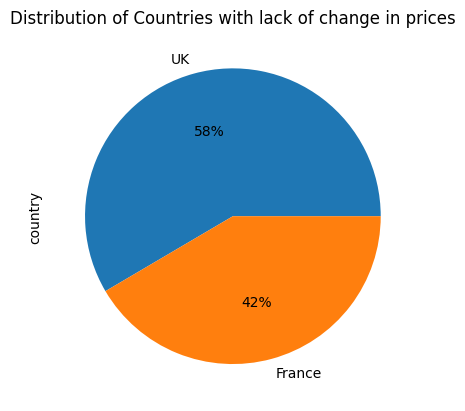

In [11]:
same_price_count = same_price['country'].value_counts()
same_price_count.plot(kind='pie',autopct='%1.0f%%').set_title("Distribution of Countries with lack of change in prices")

Notice that prices decreased only in the **USA**

In [12]:
price_decreased = page_found[page_found['price_2022'] < page_found['price']]
decreased_percentage = price_decreased.copy()
percertange_d = ((decreased_percentage['price'] - decreased_percentage['price_2022'])/ decreased_percentage['price'])*100
decreased_percentage['Percantage'] = percertange_d
decreased_percentage
decreased_percentage.iloc[:, 3:11].sort_values(['Percantage'],ascending = [False]).head(5)
decreased_percentage.iloc[:, 3:11].sort_values(['Percantage'],ascending = [False]).tail(5)

,collection,reference,price,currency,country,time scope,price_2022,Percantage
629,SUBMERSIBLE,PAM01074,20200.0,USD,USA,December 2021,16800.0,16.831683
665,SUBMERSIBLE,PAM01240,58800.0,USD,USA,December 2021,49200.0,16.326531
642,LUMINOR,PAM00742,59700.0,USD,USA,December 2021,50500.0,15.410385
611,LUMINOR,PAM01112,30700.0,USD,USA,December 2021,26000.0,15.309446
583,SUBMERSIBLE,PAM00968,20900.0,USD,USA,December 2021,17800.0,14.832536


In [13]:
decreased_percentage['Percantage'].mean()


19.337636441849913

In [14]:
price_decreased_count = price_decreased['country'].value_counts()
price_decreased_count
#price_decreased_count.plot(kind='pie',autopct='%1.0f%%').set_title("Distribution of Countries with drop in prices")

USA    113
Name: country, dtype: int64

Notice that prices increased in 3 countries : **France, Japan, and UK**

In [15]:
price_increased = page_found[page_found['price_2022'] > page_found['price']]
increased_percetage = price_increased.copy()
percertange = ((increased_percetage['price_2022'] - increased_percetage['price'])/ increased_percetage['price'])*100
increased_percetage['Percantage'] = percertange
increased_percetage.iloc[:, 3:11].sort_values(['reference','Percantage'],
              ascending = [False, False]).head(20)

,collection,reference,price,currency,country,time scope,price_2022,Percantage
427,LUMINOR,PAM02392,957000.0,JPY,Japan,December 2021,1039500.0,8.620690
87,LUMINOR,PAM02392,7700.0,EUR,France,December 2021,8200.0,6.493506
244,LUMINOR,PAM02392,6700.0,GBP,UK,December 2021,7100.0,5.970149
433,RADIOMIR,PAM02020,792000.0,JPY,Japan,December 2021,862400.0,8.888889
94,RADIOMIR,PAM02020,6500.0,EUR,France,December 2021,6800.0,4.615385
251,RADIOMIR,PAM02020,5800.0,GBP,UK,December 2021,5900.0,1.724138
464,LUMINOR,PAM01664,1683000.0,JPY,Japan,December 2021,1839200.0,9.281046
124,LUMINOR,PAM01664,13500.0,EUR,France,December 2021,14500.0,7.407407
282,LUMINOR,PAM01664,12100.0,GBP,UK,December 2021,12400.0,2.479339
422,LUMINOR,PAM01662,1804000.0,JPY,Japan,December 2021,2029500.0,12.500000


Text(0.5, 1.0, 'Distribution of Countries with rising prices')

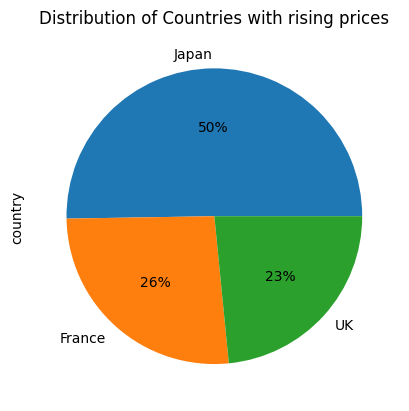

In [16]:
price_increased_count = price_increased['country'].value_counts()
price_increased_count.plot(kind='pie',autopct='%1.0f%%').set_title("Distribution of Countries with rising prices")

In [17]:
sd = increased_percetage.groupby(['country'])['Percantage'].std()
sd

country
France    2.222000
Japan     4.330412
UK        2.831441
Name: Percantage, dtype: float64

In [18]:
mean = increased_percetage.groupby(['country'])['Percantage'].mean()
mean

country
France    7.626984
Japan     7.296224
UK        5.712454
Name: Percantage, dtype: float64

# Return on Investement (ROI) for each country

Analyzing France's ROI
Analyzing UK's ROI
Analyzing Japan's ROI


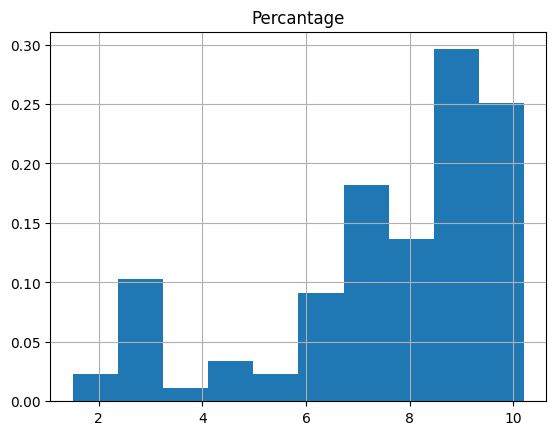

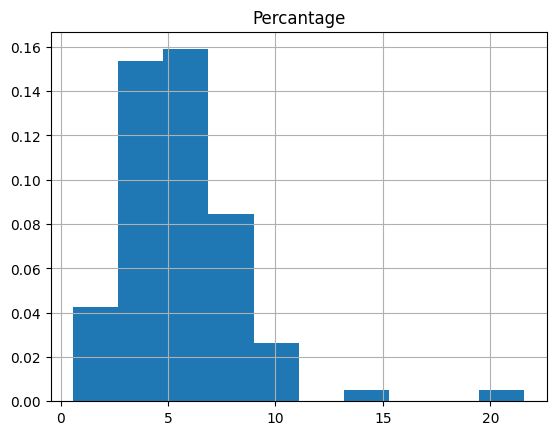

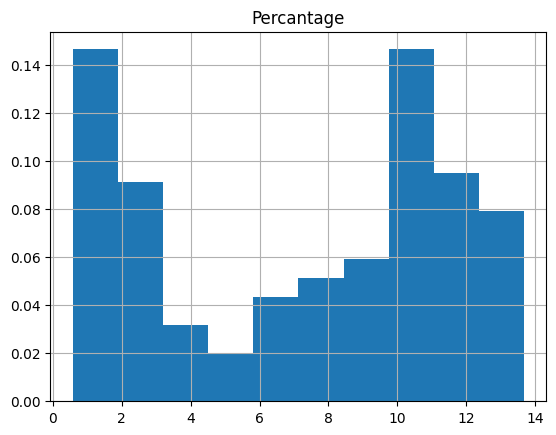

In [19]:
for country in increased_percetage.country.unique():
  watches_per_country = increased_percetage[increased_percetage.country == country]
  print(f"Analyzing {country}'s ROI")
  watches_per_country.hist(column='Percantage', density=True)

# Selling strategy from US to France

Take the top 10, but we use tail since the sort_values sorts in ascending order

In [20]:
watches_france = increased_percetage[increased_percetage.country == 'France']
import numpy as np
count, division = np.histogram(watches_france.Percantage, normed=True)

<ipython-input-20-41039d0b7280>:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  count, division = np.histogram(watches_france.Percantage, normed=True)


In [21]:
division, count

(array([ 1.50753769,  2.37719208,  3.24684648,  4.11650087,  4.98615527,
         5.85580966,  6.72546405,  7.59511845,  8.46477284,  9.33442724,
        10.20408163]),
 array([0.02276994, 0.10246474, 0.01138497, 0.03415491, 0.02276994,
        0.09107977, 0.18215954, 0.13661965, 0.29600925, 0.25046936]))

In [22]:
top_10_france_watches = increased_percetage[increased_percetage.country == 'France'].sort_values(by='Percantage' , ascending =False)
top_10_france_watches

,brand,url,image_url,collection,reference,price,currency,country,time scope,price_2022,Percantage
92,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/20...,LUMINOR,PAM01086,4900.0,EUR,France,December 2021,5400.0,10.204082
136,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/22...,LUMINOR,PAM01272,6900.0,EUR,France,December 2021,7600.0,10.144928
134,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/22...,LUMINOR,PAM01270,6900.0,EUR,France,December 2021,7600.0,10.144928
18,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/15...,LUMINOR,PAM01535,8900.0,EUR,France,December 2021,9800.0,10.112360
48,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/18...,LUMINOR,PAM01033,9100.0,EUR,France,December 2021,10000.0,9.890110
...,...,...,...,...,...,...,...,...,...,...,...
54,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/19...,LUMINOR,PAM01438,14500.0,EUR,France,December 2021,14900.0,2.758621
23,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/16...,LUMINOR-DUE,PAM00944,10900.0,EUR,France,December 2021,11200.0,2.752294
11,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/14...,LUMINOR,PAM01088,7300.0,EUR,France,December 2021,7500.0,2.739726
105,Panerai,https://www.panerai.com/fr/fr/collections/watc...,https://www.panerai.com/content/dam/rcq/pan/21...,LUMINOR,PAM01135,21900.0,EUR,France,December 2021,22300.0,1.826484


In [23]:
import bisect
for reference in top_10_france_watches.reference.unique():
  # get the same watch in the USA market
  watch_in_US = decreased_percentage[decreased_percentage.reference == reference]
  if not watch_in_US.empty:
    us_price = watch_in_US.price_2022.values[0]
    france_price = top_10_france_watches[top_10_france_watches.reference == reference].price_2022.values[0]
    percentage_change = top_10_france_watches[top_10_france_watches.reference == reference].Percantage.values[0]
    where_is_the_bin = bisect.bisect(division, percentage_change)
    where_is_the_bin = where_is_the_bin if where_is_the_bin < len(count) else len(count)
    confidence = count[where_is_the_bin-1]
    print(f'Percentage change = {percentage_change}')
    print(f'US price 2022 = {us_price} France price 2022={france_price} France price 2023={france_price+france_price*(percentage_change/100)}')
    print(f"I'm {confidence*100}% confident of the price projection")

Percentage change = 10.204081632653061
US price 2022 = 5200.0 France price 2022=5400.0 France price 2023=5951.0204081632655
I'm 25.046936297403327% confident of the price projection
Percentage change = 10.144927536231885
US price 2022 = 7400.0 France price 2022=7600.0 France price 2023=8371.014492753624
I'm 25.046936297403327% confident of the price projection
Percentage change = 10.144927536231885
US price 2022 = 7400.0 France price 2022=7600.0 France price 2023=8371.014492753624
I'm 25.046936297403327% confident of the price projection
Percentage change = 10.112359550561797
US price 2022 = 9400.0 France price 2022=9800.0 France price 2023=10791.011235955057
I'm 25.046936297403327% confident of the price projection
Percentage change = 9.89010989010989
US price 2022 = 9600.0 France price 2022=10000.0 France price 2023=10989.010989010989
I'm 25.046936297403327% confident of the price projection
Percentage change = 9.848484848484848
US price 2022 = 14300.0 France price 2022=14500.0 Franc


*   find top 10 highest and compare prices between countries
*   find 10 lowest and compare prices between countries
*   get a sample of let's 5 products to compare prices



In [24]:

"""
SELECT Offer.Offer_uid, Offer.Reference_code, Offer.Price, Offer.Currency, Reference_price.Retail_price, Brand.Brand_name
FROM Offer
LEFT JOIN Reference_price ON Offer.Reference_code=Reference_price.Reference_code AND Offer.Currency = Reference_price.Retail_Currency;
LEFT JOIN Brand ON Offer.Brand_uid = Brand.Brand_uid;

"""
# Reference_price
reference_price = pd.DataFrame(
    {'Uid':[126, 127, 128, 129, 130, 144, 145, 146, 147, 148,876 , 877, 878, 879],
     'Reference_code' : ['PAM02973', 'PAM02973', 'PAM02973' , 'PAM02973', 'PAM02973','PAM04456', 'PAM04456', 'PAM04456', 'PAM04456', 'PAM04456',"M25407N-0001","M25407N-0001","M25407N-0001" ,"M25407N-0001"  ],
     'Retail_price' : [11000, 10050, 10150, 13250000,12000, 55000, 52000, 57000, 43500 ,45000,  95000,   99000, 700000, 720000],
     'Retail_Currency': ["USD",  "EUR",  "EUR",   "KRW",  "USD",   "CNY", "EUR" ,  "CNY",   "USD",   "USD" , "USD",   "USD" , "CNY", "CNY"],
     'Brand_name': ['Panerai', "Panerai", "Panerai", "Panerai" ,"Panerai","Panerai","Panerai","Panerai" , "Panerai", "Panerai", "Tudor" , "Tudor" , "Tudor" , "Tudor"],
     'Date':["2021-10-31", "2021-10-31",  "2022-06-30",  "2022-10-31", "2022-10-31", "2021-10-31", "2022-10-31", "2022-10-31", "2021-10-31", "2022-10-31", "2021-08-30", "2022-01-31", "2021-08-30", "2022-01-31"]},
    columns=['Uid', 'Reference_code','Retail_price', 'Retail_Currency', 'Brand_name','Date' ])

# Brand
brand = pd.DataFrame(
    {'Brand_uid':[1, 2, 3, 4, 5],
     'Brand_name' : ['Baume & Mercier', 'Rolex', 'Panerai', 'Tudor Audemars', 'Piguet']},
    columns=['Brand_uid', 'Brand_name'])

# Offer
offer =  pd.DataFrame(
    {'Offer_uid':[355, 356, 357, 358, 359, 360 ,361, 362, 363, 364],
     'Reference_code' : ['PAM02973', 'PAM04456', 'PAM03201', 'PAM00014', 'PAM02973', '126217', 'MOA12567', 'MOA10034', 'M25407N-0001', '26397BC.OO.D324VE.01'],
     'Price' : [10250,46000, 101500,17250000 , 10000, 55000,990, 1250, 550000,  88800],
     'Currency': ['USD', 'USD', 'CNY', 'KRW', 'EUR', 'EUR', 'EUR', 'USD', 'CNY', 'USD'],
     'Brand_uid': [3,3,3,3,3,2,1,1,4,5]},
    columns=['Offer_uid', 'Reference_code', 'Price', 'Currency', 'Brand_uid' ])

df2 = reference_price.groupby(["Reference_code"])




df1 = pd.merge(offer, reference_price, left_on= ['Reference_code', 'Currency'],
                   right_on= ['Reference_code', 'Retail_Currency'],
                   how = 'inner').sort_values('Date', ascending =False )

df1.drop(['Brand_uid','Uid','Retail_Currency','Date'], axis=1, inplace=True)

df1

,Offer_uid,Reference_code,Price,Currency,Retail_price,Brand_name
1,355,PAM02973,10250,USD,12000,Panerai
3,356,PAM04456,46000,USD,45000,Panerai
5,359,PAM02973,10000,EUR,10150,Panerai
7,363,M25407N-0001,550000,CNY,720000,Tudor
0,355,PAM02973,10250,USD,11000,Panerai
2,356,PAM04456,46000,USD,43500,Panerai
4,359,PAM02973,10000,EUR,10050,Panerai
6,363,M25407N-0001,550000,CNY,700000,Tudor
